In [180]:
import os
from pathlib import Path

current_path = "adgm-m"

all_paths = [os.path.join(current_path, x) for x in os.listdir(current_path) if os.path.isdir(os.path.join(current_path, x))]

all_names = [x for x in os.listdir(current_path) if os.path.isdir(os.path.join(current_path, x))]

all_names

['aa2ar',
 'abl1',
 'ace',
 'aces',
 'ada',
 'ada17',
 'adrb1',
 'adrb2',
 'akt1',
 'akt2',
 'aldr',
 'andr',
 'aofb',
 'bace1',
 'braf',
 'cah2',
 'casp3',
 'cdk2',
 'comt',
 'csf1r',
 'def',
 'dhi1',
 'dpp4',
 'dyr',
 'egfr',
 'esr1',
 'esr2',
 'fa10',
 'fa7',
 'fabp4',
 'fak1',
 'fgfr1',
 'fkb1a',
 'fnta',
 'fpps',
 'gcr',
 'glcm',
 'gria2',
 'grik1',
 'hdac2',
 'hdac8',
 'hivint',
 'hivpr',
 'hivrt',
 'hmdh',
 'hs90a',
 'hxk4',
 'inha',
 'jak2',
 'kif11',
 'lck',
 'lkha4',
 'mapk2',
 'mcr',
 'met',
 'mk01',
 'mk10',
 'mk14',
 'mmp13',
 'mp2k1',
 'nos1',
 'nram',
 'pa2ga',
 'parp1',
 'pde5a',
 'pgh1',
 'pgh2',
 'plk1',
 'pnph',
 'ppara',
 'ppard',
 'pparg',
 'prgr',
 'ptn1',
 'pur2',
 'pygm',
 'pyrd',
 'reni',
 'rock1',
 'rxra',
 'sahh',
 'src',
 'tgfr1',
 'thb',
 'thrb',
 'try1',
 'tryb1',
 'tysy',
 'urok',
 'vgfr2',
 'wee1',
 'xiap']

In [181]:
auc = []
names = []
all1 = []
for path in all_paths:
    for files in os.listdir(f"{path}/docking_test"):
        try:
            if files.startswith("EF"):
                names.append(files)
                EF_path = os.path.join(f"{path}/docking_test", files)
                with open(EF_path, "r") as tmpfile:
                    auc_val = float(tmpfile.readlines()[-10].split()[-1])
                    # print(auc_val)
                    auc.append(auc_val)
                all1.append([files, auc_val])
        except:
            pass

all1

[['EF_aa2ar.txt', 0.75983],
 ['EF_abl1.txt', 0.86192],
 ['EF_ace.txt', 0.90779],
 ['EF_aces.txt', 0.73352],
 ['EF_ada.txt', 0.85142],
 ['EF_ada17.txt', 0.86818],
 ['EF_adrb1.txt', 0.9285],
 ['EF_adrb2.txt', 0.90402],
 ['EF_akt1.txt', 0.72919],
 ['EF_akt2.txt', 0.81311],
 ['EF_aldr.txt', 0.75981],
 ['EF_andr.txt', 0.81359],
 ['EF_aofb.txt', 0.76616],
 ['EF_bace1.txt', 0.81618],
 ['EF_braf.txt', 0.86553],
 ['EF_cah2.txt', 0.93734],
 ['EF_casp3.txt', 0.68787],
 ['EF_cdk2.txt', 0.76409],
 ['EF_comt.txt', 0.99509],
 ['EF_csf1r.txt', 0.85022],
 ['EF_def.txt', 0.91061],
 ['EF_dhi1.txt', 0.7316],
 ['EF_dpp4.txt', 0.86252],
 ['EF_dyr.txt', 0.97061],
 ['EF_egfr.txt', 0.70247],
 ['EF_esr1.txt', 0.93932],
 ['EF_esr2.txt', 0.92381],
 ['EF_fa10.txt', 0.92359],
 ['EF_fa7.txt', 0.99438],
 ['EF_fabp4.txt', 0.95322],
 ['EF_fak1.txt', 0.96982],
 ['EF_fgfr1.txt', 0.85687],
 ['EF_fkb1a.txt', 0.91951],
 ['EF_fnta.txt', 0.82182],
 ['EF_fpps.txt', 0.99998],
 ['EF_gcr.txt', 0.76017],
 ['EF_glcm.txt', 0.74849],

In [182]:
import statistics
statistics.mean(auc)

0.8425226086956522

In [183]:
statistics.stdev(auc)

0.11079139734197803

In [184]:
ef = []
for path in all_paths:
    for files in os.listdir(f"{path}/docking_test"):
        if files.startswith("EF"):
            EF_path = os.path.join(f"{path}/docking_test", files)
            with open(EF_path, "r") as tmpfile:
                # print(tmpfile.readlines()[-8])
                ef_val = float(tmpfile.readlines()[-8].split()[-1])
    ef.append(ef_val)

In [185]:
statistics.mean(ef)

34.58913043478261

In [186]:
statistics.stdev(ef)

19.55087500653772

In [187]:
import pandas as pd

onelig = pd.DataFrame([names, auc, ef]).T

onelig.to_csv("TMP_RESULT.csv")

In [188]:
def roc_auc_ef(ranked_file, actives_file):

    import os
    from importlib.resources import path
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np

    with open(actives_file, "r") as tempfile:
        actives = [line.strip("\n") for line in tempfile.readlines()]

    with open(ranked_file, "r") as tempfile:
        total = [line.strip("\n") for line in tempfile.readlines()]

    num_of_actives = len(actives)
    num_of_decoys = len(total) - num_of_actives

    act, dcy = 0, 0
    fpr, tpr = [], []
    for candidate in total:
        if candidate in actives:
            act += 1
        else:
            dcy += 1
        fpr.append(dcy/num_of_decoys)
        tpr.append(act/num_of_actives)
    
    return [fpr, tpr]

In [189]:
all_fpr_tpr = []
for i in all_paths:
    actives_file = f"{i}/docking_test/actives.txt"
    ranked_file = f"{i}/docking_test/ranked.txt"
    all_fpr_tpr.append(roc_auc_ef(ranked_file, actives_file))

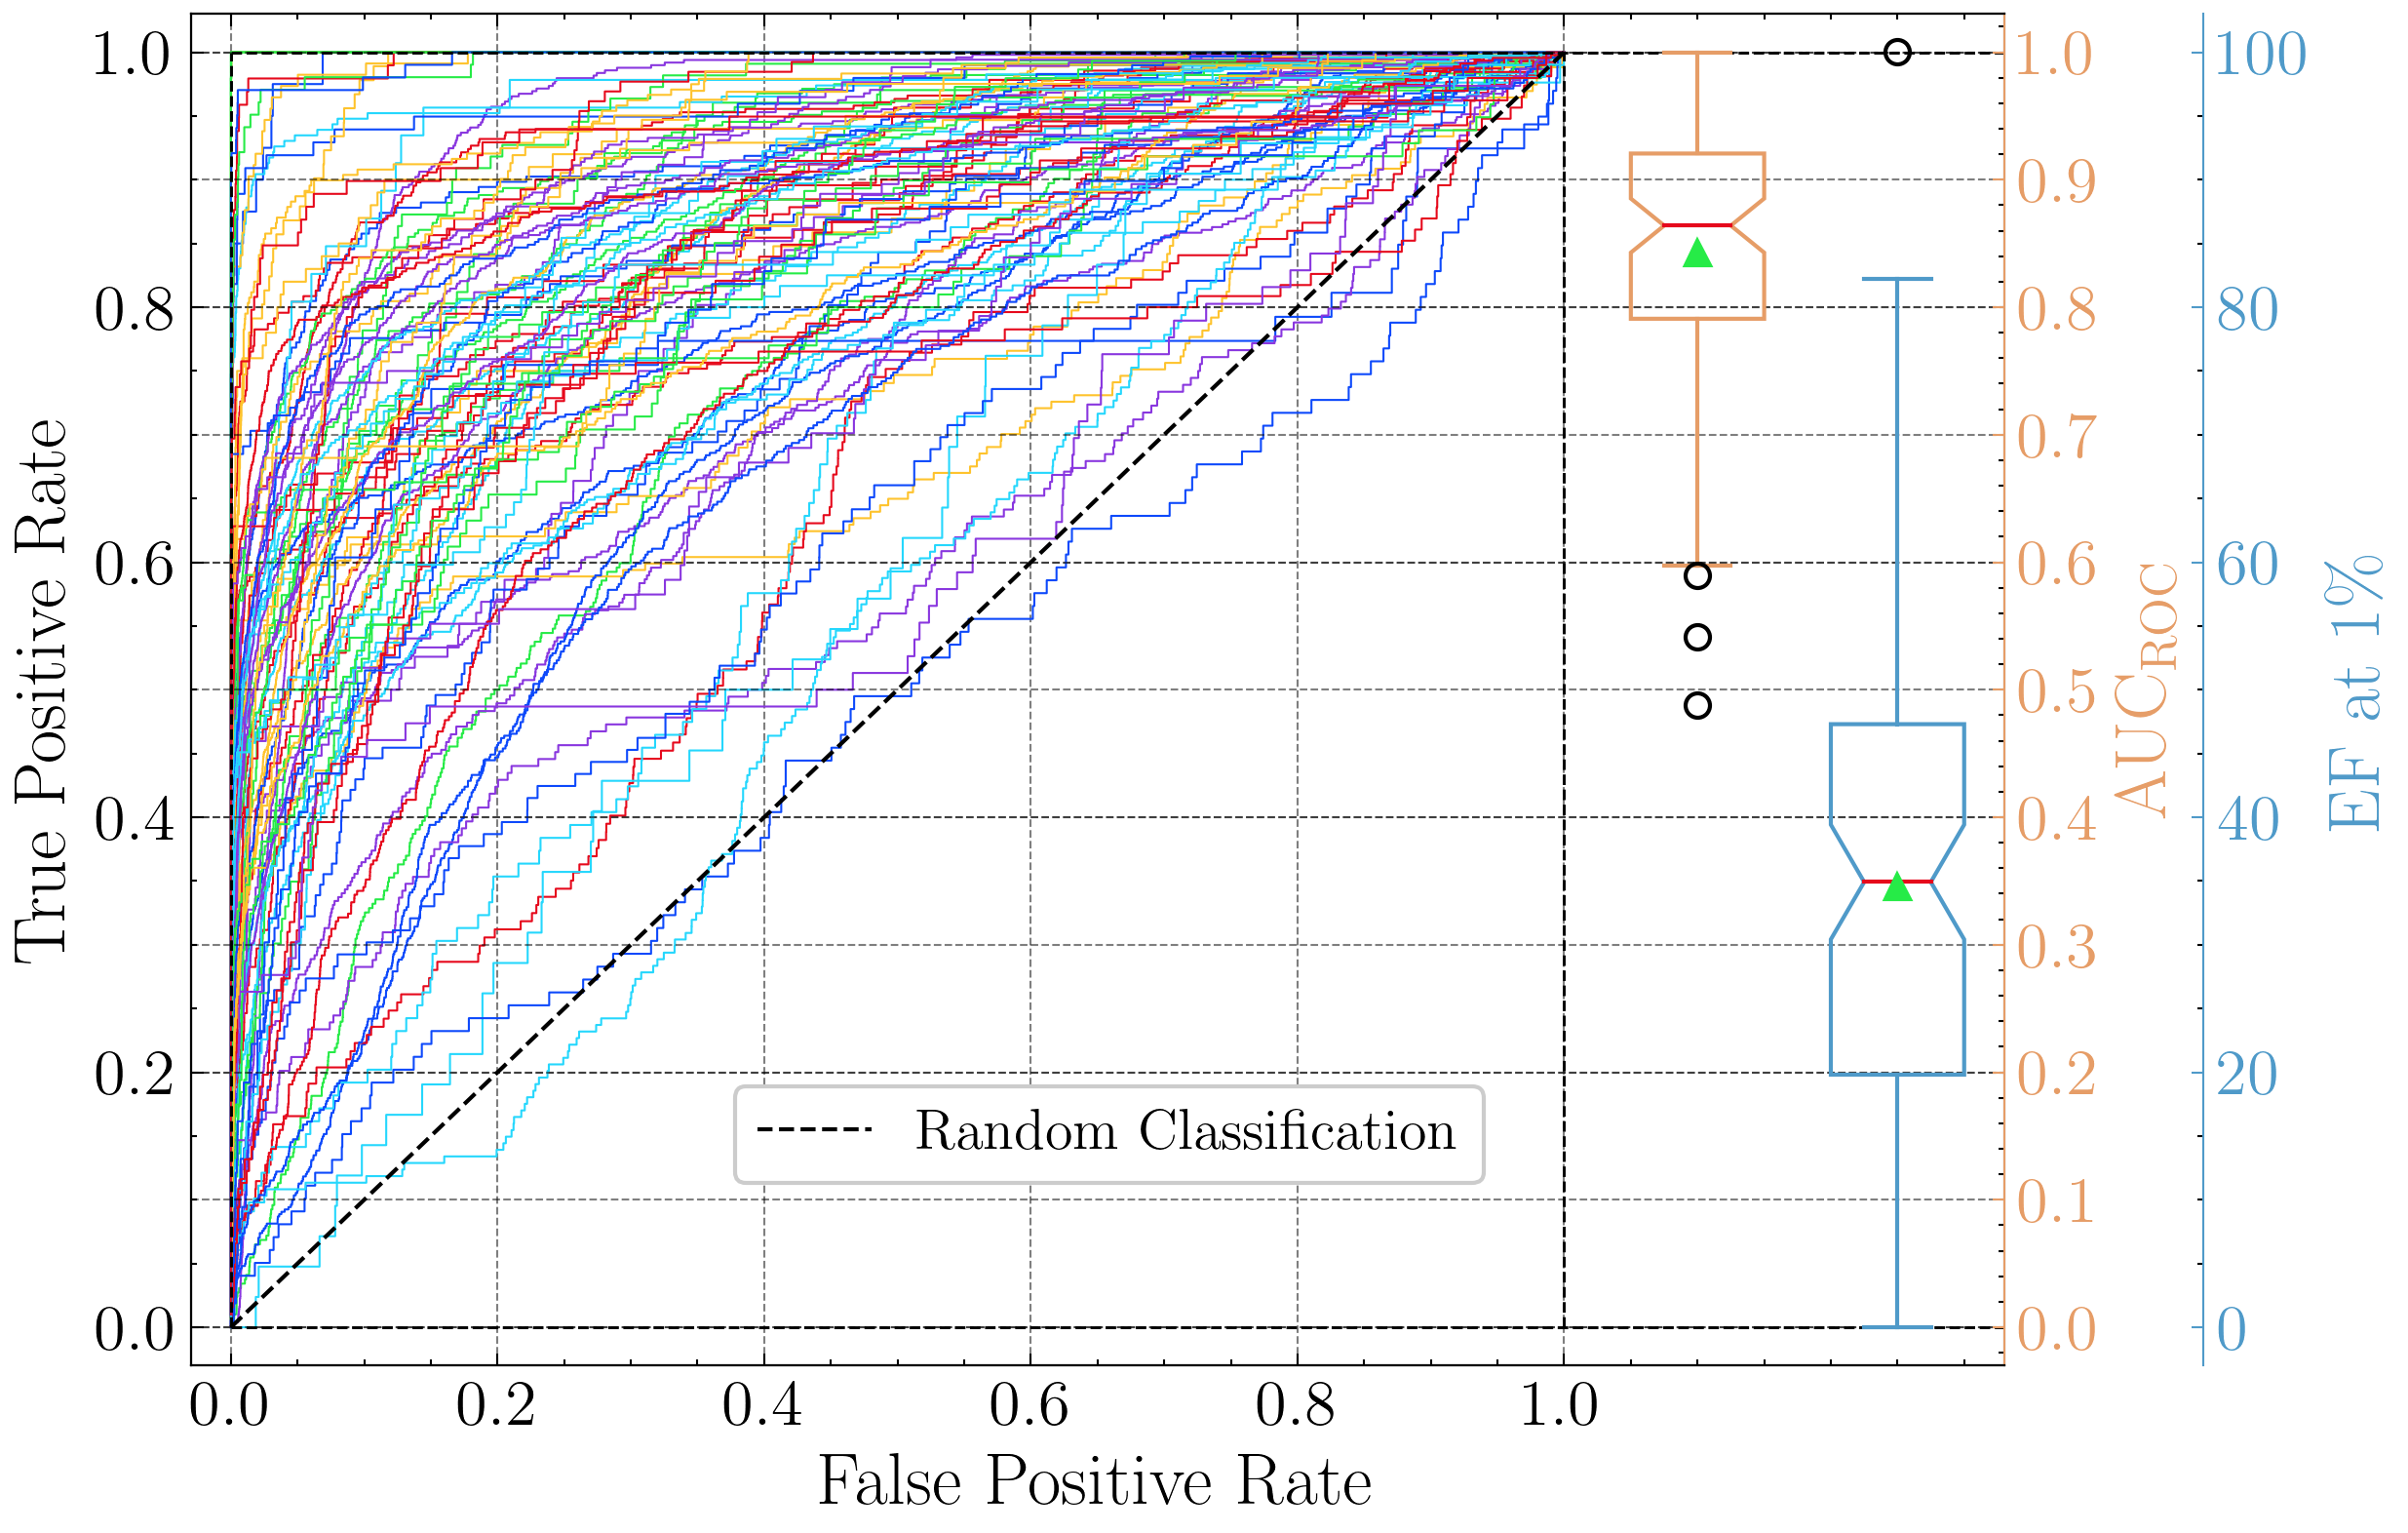

In [202]:
import matplotlib.pyplot as plt
with plt.style.context(['science', 'high-vis', "grid"]):
    # pparam = dict(xlabel='False Positive Rate', ylabel='True Positive Rate')
    fig, ax = plt.subplots(dpi=300, figsize=(8,6), sharey=True, sharex=True)
    # ax.set_title("Cluster of ROC curves")
    for pairs in all_fpr_tpr:
        ax.plot(pairs[0], pairs[1], "-", linewidth='0.5')
        
    ax2 = ax.twinx()
    
    ax2.spines['right'].set_color('#e69d67')
    
    ax2.boxplot(auc, positions=[1.1], notch=True, showmeans=True, widths=0.1, 
                patch_artist=True,
                boxprops=dict(edgecolor='#e69d67', facecolor=(0,0,0,0)),
                capprops=dict(color='#e69d67'),
                whiskerprops=dict(color='#e69d67'))
    
    
    ax2.set_ylim(bottom=-0.03, top=1.03)
    ax2.set_ylabel("AUC$_\mathrm{ROC}$", fontsize=18)
    ax2.yaxis.label.set_color('#e69d67')
    ax2.tick_params(axis='y', colors='#e69d67')
    
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('axes', 1.11))
    ax3.spines['right'].set_color("#4f9ac9")
    ax3.yaxis.label.set_color('#4f9ac9')
    ax3.tick_params(axis='y', colors='#4f9ac9')
    
    ax3.boxplot(ef, positions=[1.25], notch=True, showmeans=True, widths=0.1,
                patch_artist=True,
                boxprops=dict(edgecolor='#4f9ac9', facecolor=(0,0,0,0)),
                capprops=dict(color='#4f9ac9'),
                whiskerprops=dict(color='#4f9ac9'))
    
    ax3.set_ylim(bottom=-3, top=103)
    ax3.set_ylabel("EF at 1\%", fontsize=18)
    ax3.yaxis.grid(False)
    ax.plot(all_fpr_tpr[0][0], all_fpr_tpr[0][0], "k--", label="Random Classification")
    ax.legend(loc=(0.3,0.135), fontsize=14)
    ax.autoscale(tight=True)
    # ax.set(**pparam)
    ax.set_xlabel("False Positive Rate", fontsize=18)
    ax.set_ylabel("True Positive Rate", fontsize=18)
    
    ax.set_ylim(bottom=-0.03, top=1.03)
    ax.set_xlim(left=-0.03, right=1.33)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0], fontsize=16)
    ax2.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    ax2.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], fontsize=16)
    ax3.set_yticks([0,20,40,60,80,100])
    ax3.set_yticklabels([0,20,40,60,80,100], fontsize=16)
    ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0],fontsize=16)
    
    # ax[1].set_ylim(bottom=-0.03, top=1.03)
    # ax[1].set_xlim(left=-0.03, right=1.03)
    ax.hlines(y=[0,1], xmin=0, xmax=1.33, color='k', lw=0.7, linestyle="--")
    ax.vlines(x=[0,1], ymin=0, ymax=1, color='k', lw=0.7, linestyle="--")
    plt.show()
#     plt.savefig("ADSS-multi.svg")

In [ ]:
len(esim)

In [31]:
import numpy as np
categories = all_names
categories = [*categories, categories[0]]

scores = [*auc, auc[0]]
esims = [*esim, esim[0]]

# restaurant_1 = [4, 4, 5, 4, 3]
# restaurant_2 = [5, 5, 4, 5, 2]
# restaurant_3 = [3, 4, 5, 3, 5]
# restaurant_1 = [*restaurant_1, restaurant_1[0]]
# restaurant_2 = [*restaurant_2, restaurant_2[0]]
# restaurant_3 = [*restaurant_3, restaurant_3[0]]


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(scores))

thetatick_locs = np.degrees(label_loc)
thetatick_labels = categories
labels=[]
with plt.style.context(['science', "high-vis"]):
# plt.figure(figsize=(8, 8))
    fig = plt.figure(figsize=(10,10), dpi=300)
    ax = plt.axes(polar=True)
    ax.set_rlim(0.4, 1.05)
    ax.plot(label_loc, scores, label="ADGM-LBVS SINGLE")
    ax.plot(label_loc, esims, label="eSim -pscreen") 
    ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.01))
    # ax.set_title('Comparision of AUC Values between ADGM-LBVS SINGLE and eSim -pscreen', size=20, y=1.05) 
    ax.set_thetagrids(thetatick_locs, thetatick_labels)
    labels = []

    for label, angle in zip(ax.get_xticklabels(), thetatick_locs):
        x,y = label.get_position()
        lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                  ha=label.get_ha(), va=label.get_va())
        if 90 < angle < 270:
            lab.set_rotation(angle+180)
        else:
            lab.set_rotation(angle)
        labels.append(lab)
    ax.set_xticklabels([])
    ax.tick_params(pad=10)
    # ax.set_thetagrids(frac=1)
    # lines, labels = ax.set_thetagrids(np.degrees(label_loc), labels=categories)
    plt.savefig("radar.svg")
    plt.show()

NameError: name 'plt' is not defined

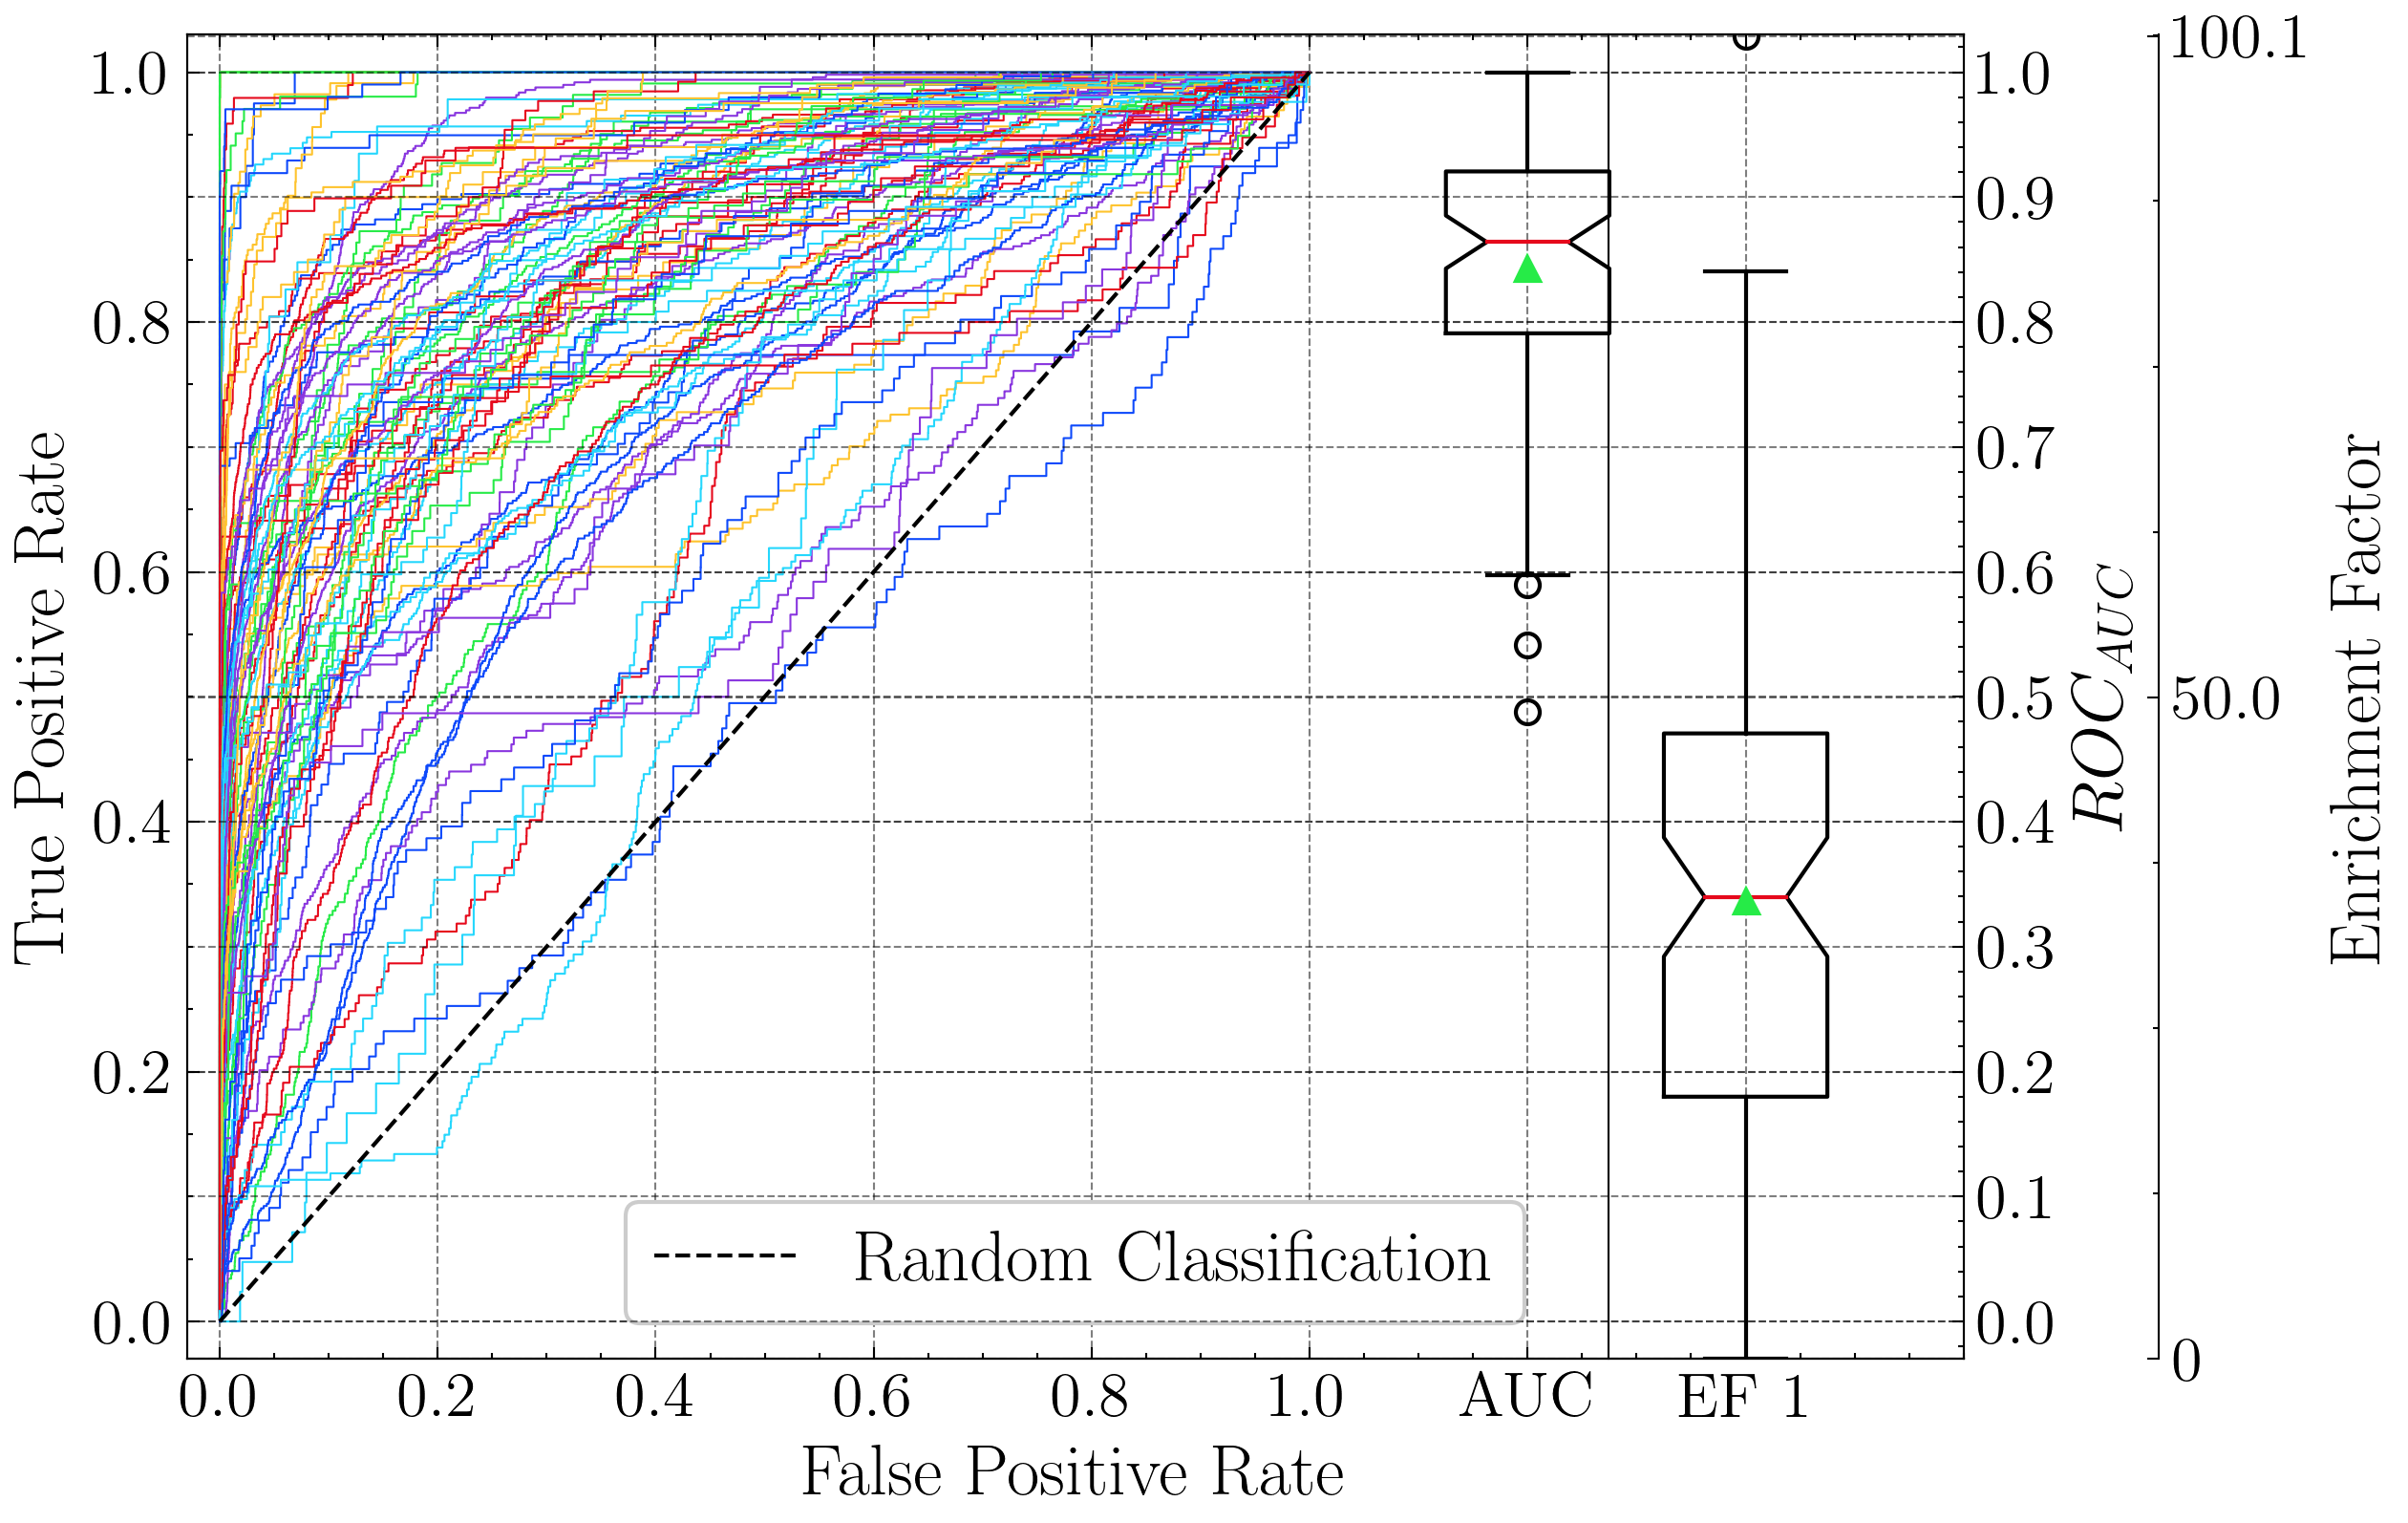

In [195]:
import matplotlib.pyplot as plt

with plt.style.context(['science', 'high-vis', 'grid']):
    fig, ax = plt.subplots(dpi=300, figsize=(8, 6), sharey=True, sharex=True)

    # Plot ROC curves
    for pairs in all_fpr_tpr:
        ax.plot(pairs[0], pairs[1], "-", linewidth='0.5')
    ax.plot(all_fpr_tpr[0][0], all_fpr_tpr[0][0], "k--", label="Random Classification")
    ax.legend(loc=8, fontsize=18)

    # Set x-axis and y-axis limits and labels
    ax.set_xlabel("False Positive Rate", fontsize=18)
    ax.set_ylabel("True Positive Rate", fontsize=18)
    ax.set_ylim(bottom=-0.03, top=1.03)
    ax.set_xlim(left=-0.03, right=1.6)
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=16)
    ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
    ax.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, "AUC", "EF1"], fontsize=16)

    # Create second y-axis for EF values
    ax2 = ax.twinx()
    ax2.spines['left'].set_position(('axes', 0.8))
    # Plot boxplot for ROC AUC values
    ax2.boxplot(auc, positions=[1.2], notch=True, showmeans=True)
    ax2.set_ylim(bottom=-0.03, top=1.03)
    ax2.set_ylabel("$ROC_{AUC}$", fontsize=18)

    # Plot boxplot for EF values on second y-axis
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('axes', 1.11))
    ax3.boxplot(ef, positions=[1.4], notch=True, showmeans=True)
    ax3.set_ylim(bottom=-0.03, top=max(ef) + 0.1)
    ax3.set_ylabel("Enrichment Factor", fontsize=18)

    # Set tick labels for second y-axis
    ax2.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax2.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=16)
    ax3.set_yticks([-0.03, max(ef) / 2, max(ef)])
    ax3.set_yticklabels([0, round(max(ef) / 2, 1), round(max(ef), 1)], fontsize=16)
    ax3.set_ylim(bottom=-0.03, top=max(ef) + 0.1)
    
    ax.set_xlabel("False Positive Rate", fontsize=18)
    ax.set_ylabel("True Positive Rate", fontsize=18)
    ax.set_ylim(bottom=-0.03, top=1.03)
    ax.set_xlim(left=-0.03, right=1.6)
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=16)
    ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
    ax.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, "AUC", "EF 1%"], fontsize=16)

    plt.show()